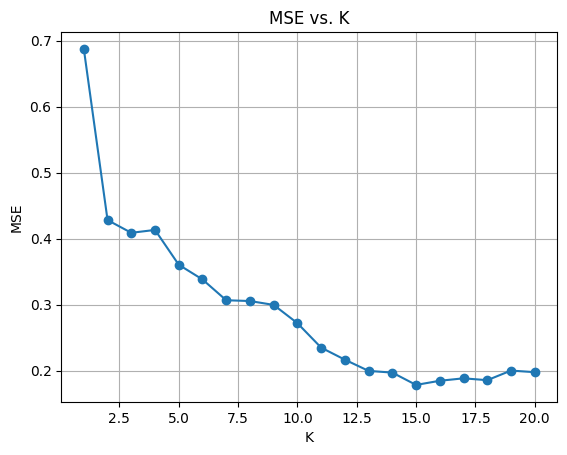

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Read data
data = pd.read_csv("Japan_life_expectancy.csv")

# Convert categorical variables to numerical ones
data = pd.get_dummies(data)

# Assuming 'Life_expectancy' is the target variable
X = data.drop(columns=["Life_expectancy"]).values
y = data["Life_expectancy"].values

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Find MSE for different K values (1-20)
k_values = range(1, 21)
mse_values = []

for k in k_values:
    # Train KNN model
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Make predictions
    y_pred = knn.predict(X_test)

    # Calculate MSE
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)

# Plot the graph
plt.plot(k_values, mse_values, marker='o')
plt.xlabel("K")
plt.ylabel("MSE")
plt.title("MSE vs. K")
plt.grid(True)
plt.show()
